<a href="https://colab.research.google.com/github/AGAMPANDEYY/Fake_News_Detection/blob/main/FND_Agam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
Importing Libraries

In [ ]:
!gdown https://drive.google.com/uc?id=1fVnebHK6_MTdXb23AS30WsMdcVGbp2u9

Downloading...
From: https://drive.google.com/uc?id=1fVnebHK6_MTdXb23AS30WsMdcVGbp2u9
To: /content/train.csv
100% 98.6M/98.6M [00:00<00:00, 226MB/s]


In [ ]:
!gdown https://drive.google.com/uc?id=1M5u_JdHSKMksIQ9stOl1_Wceh9zDrjLI

Downloading...
From: https://drive.google.com/uc?id=1M5u_JdHSKMksIQ9stOl1_Wceh9zDrjLI
To: /content/test.csv
100% 25.1M/25.1M [00:00<00:00, 85.4MB/s]


In [ ]:
!gdown  https://drive.google.com/uc?id=130GGVZH19e7oEcmd7yEGHSdbBCJ3Y7y9


Downloading...
From: https://drive.google.com/uc?id=130GGVZH19e7oEcmd7yEGHSdbBCJ3Y7y9
To: /content/abcnews-date-text.csv
100% 63.8M/63.8M [00:00<00:00, 133MB/s]


In [ ]:
!gdown  https://drive.google.com/uc?id=1km14Z6qHYtMI3WvOFb31jjxs893s6CiD

Downloading...
From: https://drive.google.com/uc?id=1km14Z6qHYtMI3WvOFb31jjxs893s6CiD
To: /content/glove.6B.100d.txt
100% 347M/347M [00:05<00:00, 67.9MB/s]


# **IMPORTING REQUIRED LIBRARIES**

In [ ]:
#calling libraries and packages to use in the FND
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import re #using regular expression to read the texts
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
nltk.download('stopwords')
#SVM
from sklearn import svm
#LSTM
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.layers import LSTM
from keras.layers import Dropout,Dense,Embedding
from keras import Sequential
#LDA
#for visualization of the topics we use PyLDAvis
#import pyLDAvis
import gensim.corpora as corpora
import re

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Dataset Pre-**processing**

In [ ]:
news_dataset=pd.read_csv('train.csv')

In [ ]:
print(news_dataset)

          id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
20795  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flynn   
2                             Consortiu

In [ ]:
news_dataset.shape

(20800, 5)

In [ ]:
#now we will check for any missing values
print(news_dataset.isnull().sum())

id           0
title      558
author    1957
text        39
label        0
dtype: int64


In [ ]:
#filling the missing values with null
news_dataset=news_dataset.fillna('')
print(news_dataset.isnull().sum())

id        0
title     0
author    0
text      0
label     0
dtype: int64


In [ ]:
#Instead of going through the texts of the news,which will take a lot of time,we can use the author and the title of the news for training
news_dataset['titaut']=news_dataset['title']+news_dataset['author']
################################################################
#seperating the label from dataset
news_dataset_wlabel=news_dataset.drop(columns='label',axis=1)
news_dataset_label=news_dataset['label']
print("Printing data without label and with label:")
print(news_dataset_wlabel)
print(news_dataset_label)
###########################################################


Printing data without label and with label:
          id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
20795  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flyn

In [ ]:
print(news_dataset_wlabel.shape)
print(news_dataset_label.shape)

(20800, 5)
(20800,)


In [ ]:
#stemming of the title and author
port_stem=PorterStemmer()
def stemmingprocess(content):
    news_dataset_wlabel_afterstem=re.sub('[^a-zA-Z]',' ',content)
    news_dataset_wlabel_afterstem=news_dataset_wlabel_afterstem.lower()
    news_dataset_wlabel_afterstem=news_dataset_wlabel_afterstem.split()
    news_dataset_wlabel_afterstem=[port_stem.stem(word) for word in news_dataset_wlabel_afterstem if not word in stopwords.words('english')]
    news_dataset_wlabel_afterstem=' '.join(news_dataset_wlabel_afterstem)
    return news_dataset_wlabel_afterstem
news_dataset_wlabel['titaut']=news_dataset_wlabel['titaut'].apply(stemmingprocess)
#print(news_dataset_wlabel['titaut'])
x=news_dataset_wlabel['titaut'].values
y=news_dataset['label'].values
print(x)
print(y)
tokenizer=Tokenizer()
tokenizer.fit_on_texts(x)
word_index=tokenizer.word_index
wordssize=len(word_index)
print("The total words in the titaut column is ",wordssize)
print(word_index)

['hous dem aid even see comey letter jason chaffetz tweet itdarrel lucu'
 'flynn hillari clinton big woman campu breitbartdaniel j flynn'
 'truth might get firedconsortiumnew com' ...
 'maci said receiv takeov approach hudson bay new york timesmichael j de la merc rachel abram'
 'nato russia hold parallel exercis balkansalex ansari'
 'keep f alivedavid swanson']
[1 0 1 ... 0 1 1]
The total words in the titaut column is  23603
{'new': 1, 'york': 2, 'trump': 3, 'clinton': 4, 'hillari': 5, 'donald': 6, 'news': 7, 'u': 8, 'elect': 9, 'say': 10, 'obama': 11, 'russia': 12, 'com': 13, 'video': 14, 'time': 15, 'us': 16, 'war': 17, 'presid': 18, 'world': 19, 'state': 20, 'report': 21, 'america': 22, 'american': 23, 'vote': 24, 'fbi': 25, 'call': 26, 'comment': 27, 'attack': 28, 'day': 29, 'year': 30, 'email': 31, 'get': 32, 'hous': 33, 'white': 34, 'blogger': 35, 'kill': 36, 'media': 37, 'polic': 38, 'key': 39, 'timesmichael': 40, 'plan': 41, 'campaign': 42, 'de': 43, 'make': 44, 'russian': 45,

In [ ]:
x.shape

(20800,)

In [ ]:
#vectorizing the title author content
vectorizer=TfidfVectorizer()
vectorizer.fit(x)
x=vectorizer.transform(x)
print(x)
#now splitting of our data into testing and training datas
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,stratify=y,random_state=10)
#random_state can have any integer value 0 to 42 and we get different shufflings
print(x_train.shape)
print(y_train.shape)

  (0, 21557)	0.2736369479869461
  (0, 18009)	0.2438301027041085
  (0, 11974)	0.34466883664274506
  (0, 11617)	0.2783091851108118
  (0, 10495)	0.311553446057155
  (0, 10381)	0.41343221816522613
  (0, 9475)	0.20871803491508256
  (0, 6798)	0.22134331972572915
  (0, 5178)	0.25645024223907936
  (0, 3933)	0.23592778464338887
  (0, 3291)	0.34851330509336254
  (0, 381)	0.25686395241555227
  (1, 23108)	0.2952143706864955
  (1, 9174)	0.18812765977413537
  (1, 7534)	0.6987204016565229
  (1, 3714)	0.18820851327454977
  (1, 2957)	0.37436858023248293
  (1, 2482)	0.3616637468521842
  (1, 1956)	0.2878737833766196
  (2, 21453)	0.41331452278016145
  (2, 12835)	0.4627692646157023
  (2, 8113)	0.3260098284202015
  (2, 7391)	0.6469324358467595
  (2, 3910)	0.30035267305096314
  (3, 21978)	0.23565193182482072
  :	:
  (20797, 23430)	0.08239795721216821
  (20797, 20788)	0.19858848268663878
  (20797, 19961)	0.32033450422171095
  (20797, 17564)	0.24595228419376997
  (20797, 16511)	0.2701082984026285
  (20797, 162

In [ ]:
len(vectorizer.vocabulary_)

23585

Since I am getting sparse matrix error,so i'll be taking only top 10k words

## LOGISTIC REGRESSION MODEL

In [ ]:
#Now model:logistic regression
model1=LogisticRegression()
model1.fit(x_train,y_train)

#Validation pahse>>here we will compare the accuracies of different models.
#Accuracy score
x_train_prediction=model1.predict(x_train)
accuracy_train=accuracy_score(x_train_prediction,y_train)
print("The Accuracy of Logistics Regression on training dataset : ",accuracy_train*100)
#We have done prediction on training set but actually we need the accuracy of testing datasets
x_test_prediction=model1.predict(x_test)
accuracy_test=accuracy_score(x_test_prediction,y_test)
print("The Accuracy of Logistics Regression on testing dataset : ",accuracy_test*100)


The Accuracy of Logistics Regression on training dataset :  98.09065934065934
The Accuracy of Logistics Regression on testing dataset :  96.50641025641026


In [ ]:
#Predictions of individual news
x_test1=x_test[0]
prediction=model1.predict(x_test1)
print("The news is:",y_test[0])
print("The prediction made by Model-Logistic Regression:")
print("-----------------")
if(prediction==1):
    print("The news is Fake")
else:
   print("The news is Real")

The news is: 0
The prediction made by Model-Logistic Regression:
-----------------
The news is Real


# Hypertuining of parameters

In [ ]:
#improving accuracy of logistic regression using regularization (Hyperparameter tuning)
from sklearn.model_selection import GridSearchCV
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore')
logreg=LogisticRegression()

# PLOT GRPAH FOR EACH PENALTY
hyparam_grid=[
    {
    'penalty':['l1','l2','none'],
     'C': np.logspace(-4,4,7),
     'solver': ['lbgs','newton-cg','liblinear','sag','saga'],
     'max_iter':[10000]
     }
]
clf=GridSearchCV(logreg,param_grid=hyparam_grid,scoring='accuracy',cv=2,n_jobs=-1)
best_clf=clf.fit(x_train,y_train)
best_clf.best_estimator_
print("The accuracy of the logistic regression on training dataset after hyperparameter tuning is :",best_clf.score(x_train,y_train)*100)


The accuracy of the logistic regression on training dataset after hyperparameter tuning is : 100.0


In [ ]:
x_test_prediction_byhypertuninglogreg_forx_test3=best_clf.predict(x_test[3])
if(y_test[3]==0):
    c="Real"
else:
    c="Fake"
print("The news is actaully ",c)
if(x_test_prediction_byhypertuninglogreg_forx_test3==1):
    print("The news is Fake predicted by tuned logistic regression model")
else:
    print("The news is Real predicted by tuned logistic regression model")

x_test_prediction_byhypertuninglogreg=best_clf.predict(x_test)
x_test_prediction_byhypertuninglogreg_accuracy=accuracy_score(x_test_prediction_byhypertuninglogreg,y_test)*100
print("The accuracy score on testing sample after hyperparameter tuning of logreg model is ",x_test_prediction_byhypertuninglogreg_accuracy)




The news is actaully  Fake
The news is Fake predicted by tuned logistic regression model
The accuracy score on testing sample after hyperparameter tuning of logreg model is  98.8301282051282


## **LSTM**

WordCloud for EDA

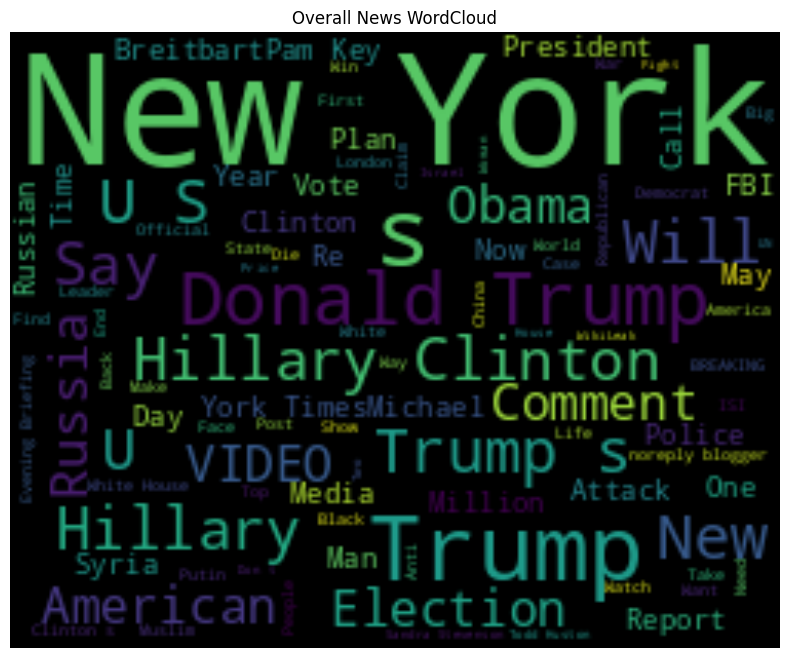

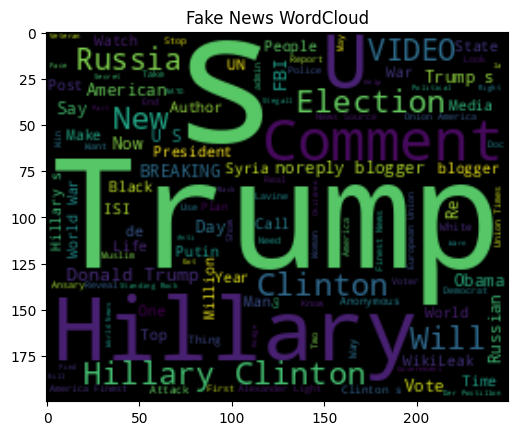

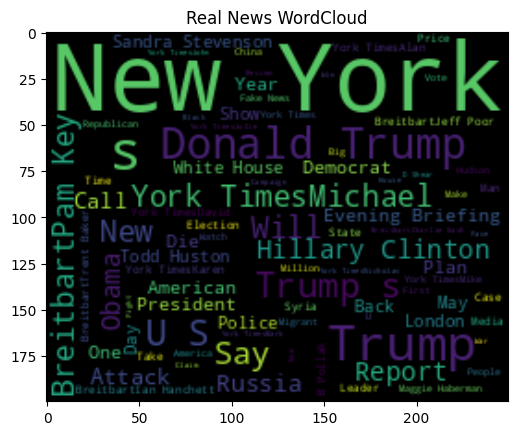

In [ ]:
#now visualising the frequent words
#EDA
from wordcloud import WordCloud
#this is for overall news
allwords=' '.join(words for words in news_dataset['titaut'])
wordcl=WordCloud(height=200,width=250,random_state=42,max_font_size=100).generate(allwords)
allwords_fake=' '.join(words for words in news_dataset['titaut'][news_dataset['label']==1])
wordcl_fake=WordCloud(height=200,width=250,random_state=42,max_font_size=100).generate(allwords_fake)
allwords_real=' '.join(words for words in news_dataset['titaut'][news_dataset['label']==0])
wordcl_real=WordCloud(height=200,width=250,random_state=42,max_font_size=100).generate(allwords_real)
fig=plt.figure(figsize=(15,8))
rows=2
col=2
plt.axis('off')
#fig.add_subplot(rows,col,1)
plt.imshow(wordcl,interpolation='bilinear')
plt.title('Overall News WordCloud')
plt.show()
#fig.add_subplot(rows,col,2)
plt.imshow(wordcl_fake,interpolation='bilinear')
plt.title('Fake News WordCloud')
plt.show()
#fig.add_subplot(rows,col,3)
plt.imshow(wordcl_real,interpolation='bilinear')
plt.title('Real News WordCloud')
plt.show()

Tokenizer

In [ ]:
#using keras for preprocessing
#import tensorflow
#from keras.preprocessing import Tokenizer
#from tensorflow.keras.preprocessing.text import Tokenizer
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
#tokenizing



In [ ]:
#embedding layer- convert words to matrix of 100d
emb_index={} #this will have words and their vectors in 100d
with open ("/content/glove.6B.100d.txt",encoding="utf-8") as f:
    for line in f:
        values=line.split()
        word=values[0]
        veccoeff=np.asarray(values[1:],dtype='float32') #stores array vector coeff of words in glove.6B
        emb_index[word]=veccoeff

emb_matrix=np.zeros((wordssize+1,100))
for word in word_index.keys():
    #word=word_index.values().index(i)
    i=word_index[word]
    word_vector=emb_index.get(word)
    if word_vector is not None:
        emb_matrix[i]=word_vector

print("embedded matrix first word ",emb_matrix[2])
print(x_train.shape)
print(y_train.shape)

embedded matrix first word  [ 0.75694001  0.033857    0.37807    -0.52494001  0.66977     0.0087849
  0.29571     0.28479999 -0.75305998  0.028146   -0.17275    -1.10510004
 -0.32793999 -0.22629     0.26637    -0.52504998  0.72794998 -0.37079
 -0.59310001 -0.38292     0.34215999  0.29214001 -0.13127001 -0.11968
  0.56546003 -0.49292001  0.27956    -0.85311002 -0.022971    0.40805
  0.26495001  0.90006    -0.28523001  0.56483001 -1.03079998  0.046979
 -0.25327    -0.59652001  0.70418    -0.19515     0.13675    -0.80739999
 -0.67271    -0.41185999  0.22363     0.096915   -0.043122   -0.69884998
  0.58424997 -0.24611001  0.33859    -0.080402    0.63474     0.15447
 -0.89735001 -2.80349994 -0.065357   -0.057547    1.3161      0.57924002
 -1.04540002  0.96129    -0.14676    -0.19215     0.17742001 -0.69164002
  0.23424999  0.55023998  0.41043001  0.49834999 -0.85245001 -0.18501
 -1.17190003 -0.10409     0.19547001 -0.79821998  0.10368    -0.17151
 -1.31949997 -0.67411     0.26547     0.4922

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **LSTM Model Creation **

In [ ]:
from keras.layers import LSTM
from keras.layers import Dropout,Dense,Embedding
from keras import Sequential

model=Sequential()
model.add(Embedding(wordssize+1,100,weights=[emb_matrix],trainable=False))#trainable is set to false because we are using self supervised learning we already know that the words vector stored in embmatrix that is derived from Glove_6B_100d is true so we dont need to update the weight matrix rn.
model.add(Dropout(0.3))# we will drop 30% of neurons in embedding layer to prevent overfitting
model.add(LSTM(128,return_sequences='True'))
model.add(LSTM(128))
model.add(Dropout(0.3))
#model.add(Dense(256))
#model.add(Dropout(0.3))
model.add(Dense(128))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics='accuracy')
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         2360400   
                                                                 
 dropout (Dropout)           (None, None, 100)         0         
                                                                 
 lstm (LSTM)                 (None, None, 128)         117248    
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0

## Training Model

In [ ]:
#training
x_train=x_train.toarray()
model_history=model.fit(x_train,y_train,epochs=5,batch_size=64,validation_data=(x_test,y_test))
lstm_prediction=model.predict(x_test)
accuracy_lstm=accuracy_score(lstm_prediction,y_test)
print("The accuracy of LSTM is ",accuracy_lstm)


Epoch 1/5


# Visualizing Loss and Accuracy

In [ ]:
#visualising the loss and the accuracy of test and train samples
plt.plot(history_model.model_history('accuracy'))#plottng training dataset accurcay
plt.plot(history_model.model_history('val_accuracy'))#test data accuracy
plt.x_label('Time')
plt.y_label('Accuracy')
plt.legend(['Training Dataset','Testing Dataset'])
plt.show()

plt.plot(history_model.model_history('loss'))#plottng training dataset accurcay
plt.plot(history_model.model_history('val_loss'))#test data accuracy
plt.x_label('Time')
plt.y_label('loss')
plt.legend(['Training Dataset','Testing Dataset'])
plt.show()

NameError: ignored

## Importing dataset and pre-processing (Stopwords,Stemming,vectorizer)

## SVM Model

In [ ]:
X_svm_train,X_svm_test,Y_svm_train,Y_svm_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=10)
svmclassifier=svm.SVC(C=1.0,kernel='linear',degree=3,gamma='auto')
#X_svm_train=X_svm_train.toarray()

In [ ]:
svmclassifier.fit(X_svm_train,Y_svm_train)

SVC(gamma='auto', kernel='linear')

In [ ]:
svm_prediction=svmclassifier.predict(X_svm_test)

In [ ]:
accuracy_svm=accuracy_score(svm_prediction,Y_svm_test)
print("The accuracy of SVM Classifier is ", accuracy_svm*100)


The accuracy of SVM Classifier is  98.77403846153847


In [ ]:
print(X_svm_train,Y_svm_train)

  (0, 2471)	0.2791680023027383
  (0, 2839)	0.3765791928452515
  (0, 4232)	0.25650793038746145
  (0, 8354)	0.2791680023027383
  (0, 8631)	0.2529581694948797
  (0, 8920)	0.2572561639558918
  (0, 11402)	0.27155813138468926
  (0, 11445)	0.30519738882246406
  (0, 13951)	0.35163566648957867
  (0, 17904)	0.34805499931499484
  (0, 18124)	0.30769219583299484
  (1, 2833)	0.455394571756635
  (1, 3486)	0.35574762964079487
  (1, 3989)	0.41930123038310957
  (1, 9329)	0.3436184910338499
  (1, 19491)	0.5337144155886401
  (1, 22562)	0.29550150834006556
  (2, 4014)	0.3854426652539305
  (2, 5178)	0.28362436506453303
  (2, 5749)	0.3145460318932786
  (2, 7175)	0.22607841375148358
  (2, 8550)	0.28183970566896577
  (2, 9174)	0.17142620584726195
  (2, 15848)	0.45724055220434145
  (2, 19707)	0.3482861433487035
  :	:
  (16637, 20165)	0.20614094676120298
  (16637, 21934)	0.35038616711085385
  (16637, 22628)	0.2921088083791874
  (16637, 22766)	0.22788242614821594
  (16638, 408)	0.4048355091121015
  (16638, 4078)	

# LDA FOR NEWS CLASSIFICATION

Preprocessing

In [ ]:
news_dataset=pd.read_csv("/content/abcnews-date-text.csv")
print("The total number of articles are ",len(news_dataset['headline_text'].index))
news_dataset=news_dataset.fillna('')
news_dataset_headline=news_dataset['headline_text']



The total number of articles are  1244184


In [ ]:
#tokenize then stopwords remove them stemming then vectorize
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
from sklearn.metrics import accuracy_score
stemmer=PorterStemmer()
#news_dataset_headline=news_dataset_headline[:20000]
def stemming(content):
    news_dataset_headline_astem=re.sub('[^a-z,A-Z]',' ',content)
    news_dataset_headline_astem=news_dataset_headline_astem.lower()
    news_dataset_headline_astem=news_dataset_headline_astem.split()
    news_dataset_headline_astem=[stemmer.stem(word) for word in news_dataset_headline_astem if not word in stopwords.words('english')]
    news_dataset_headline_astem=' '.join(news_dataset_headline_astem)
    return news_dataset_headline_astem

news_dataset['headline_text']=news_dataset['headline_text'].apply(stemming)
news_dataset_headline=news_dataset['headline_text']
print("The stemmed words are", news_dataset_headline[2])
x_news_dataset_headline=news_dataset_headline.values
#vectorizing


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


The stemmed words are g call infrastructur protect summit
The stemmed words are g call infrastructur protect summit


In [ ]:
print(x_news_dataset_headline)


['aba decid commun broadcast licenc' 'act fire wit must awar defam'
 'g call infrastructur protect summit' ...
 'wa delay adopt new close contact definit'
 'western ringtail possum found badli dehydr heatwav'
 'make close covid contact new rule']


In [ ]:
#problem

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
x_news_dataset_headline_btoken=x_news_dataset_headline
tokenizer=Tokenizer()
tokenizer.fit_on_texts(x_news_dataset_headline)
word_index=tokenizer.word_index
word_len=len(word_index)
print("The tokenized texts dictionary is ",word_len)
print("tokenized is ", x_news_dataset_headline)
texts=x_news_dataset_headline.tolist()
print(len(texts))

tokenizer=Tokenizer()
tokenizer.fit_on_texts(texts)
print(texts)
i=0
news_tokenized=[]
for text in texts :
     a=text.split()
     news_tokenized.append(a)
print(news_tokenized)

The tokenized texts dictionary is  73220
tokenized is  ['aba decid commun broadcast licenc' 'act fire wit must awar defam'
 'g call infrastructur protect summit' ...
 'wa delay adopt new close contact definit'
 'western ringtail possum found badli dehydr heatwav'
 'make close covid contact new rule']
1244184


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pyLDAvis
import gensim.corpora as corpora
import re

/usr/local/lib/python3.10/dist-packages/google/rpc/__init__.py:20: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google.rpc')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  pkg_resources.declare_namespace(__name__)
/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:2349: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(parent)


In [ ]:
print(news_dataset_headline)
print(word_index)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


NameError: ignored

Creating corpus dict document term matrix

In [ ]:
id2word=corpora.Dictionary(news_tokenized)
print(id2word)
words=news_tokenized
corpus=[id2word.doc2bow(text) for text in words]

Dictionary<73220 unique tokens: ['aba', 'broadcast', 'commun', 'decid', 'licenc']...>


LDA Model

In [ ]:
import gensim
from pprint import pprint
LDA=gensim.models.ldamodel.LdaModel
topics=10
lda_model=LDA(corpus=corpus,id2word=id2word,num_topics=topics)
pprint(lda_model.print_topics())
doc_lda=lda_model[corpus]

[(0,
  '0.025*"news" + 0.023*"coronaviru" + 0.022*"state" + 0.017*"quarantin" + '
  '0.013*"nsw" + 0.012*"say" + 0.011*"updat" + 0.011*"support" + 0.011*"covid" '
  '+ 0.011*"look"'),
 (1,
  '0.076*"australia" + 0.041*"covid" + 0.036*"coronaviru" + 0.030*"govern" + '
  '0.027*"record" + 0.019*"new" + 0.018*"chang" + 0.017*"peopl" + '
  '0.017*"china" + 0.016*"world"'),
 (2,
  '0.034*"new" + 0.022*"south" + 0.022*"donald" + 0.020*"nsw" + '
  '0.020*"coronaviru" + 0.019*"protest" + 0.018*"coast" + 0.016*"women" + '
  '0.016*"morrison" + 0.015*"take"'),
 (3,
  '0.054*"australian" + 0.016*"age" + 0.015*"care" + 0.014*"perth" + '
  '0.013*"local" + 0.012*"million" + 0.011*"resid" + 0.011*"flood" + '
  '0.011*"leav" + 0.010*"beach"'),
 (4,
  '0.033*"trump" + 0.023*"elect" + 0.018*"bushfir" + 0.016*"famili" + '
  '0.013*"new" + 0.012*"commun" + 0.011*"make" + 0.010*"plan" + 0.010*"nsw" + '
  '0.009*"presid"'),
 (5,
  '0.030*"restrict" + 0.028*"polic" + 0.020*"scott" + 0.016*"investig" + '
  '

LDA MODEL VISUALIZATION

In [ ]:
import pyLDAvis
pyLDAvis.enable_notebook()
import pyLDAvis.gensim
vis=pyLDAvis.gensim.prepare
ldavis=vis(lda_model,corpus,id2word)
ldavis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.037566 -0.071099       1        1  12.413444
7      0.205361 -0.200221       2        1  11.516448
6     -0.019953 -0.088975       3        1  10.374862
0     -0.108224 -0.053958       4        1   9.870816
2     -0.117051 -0.177705       5        1   9.757154
9     -0.192742  0.039844       6        1   9.582167
8      0.111260  0.257523       7        1   9.507488
3      0.064977  0.274434       8        1   9.381182
1     -0.201249  0.069945       9        1   9.139494
5      0.295186 -0.049787      10        1   8.456944, topic_info=             Term          Freq         Total Category  logprob  loglift
48      australia  46135.000000  46135.000000  Default  30.0000  30.0000
24     australian  33696.000000  33696.000000  Default  29.0000  29.0000
344          case  31953.000000  31953.000000  Default  28.0000  28.0000
2309   queensland  28125.000000  28125.000000  Default  27.0000  27.0000
70346       covid  74982.000000  74982.000000  Default  26.0000  26.0000
...           ...           ...           ...      ...      ...      ...
72          water   5147.144621   7832.266694  Topic10  -4.6976   2.0504
165         death   6589.833521  18044.309721  Topic10  -4.4505   1.4629
503           may   4104.995129   5830.451573  Topic10  -4.9238   2.1193
420       concern   4890.871474   9589.555362  Topic10  -4.7487   1.7969
551      question   3832.159576   5114.622164  Topic10  -4.9926   2.1815

[408 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
5217      5  0.999936       abc
373       6  0.999702  aborigin
2182      1  0.999930      abus
250       3  0.999846     accus
1617      9  0.999666    across
...     ...       ...       ...
1268      1  0.243159      year
1268      2  0.615586      year
1268      3  0.141225      year
412       9  0.999778     young
440       5  0.999918   zealand

[471 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 8, 7, 1, 3, 10, 9, 4, 2, 6])

Now,tuining the num of topics using perplexity and coherence scores

In [ ]:
perplexity=lda_model.log_perplexity(corpus)
#now coherence score

from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda=CoherenceModel(model=lda_model,dictionary=id2word,texts=news_tokenized,coherence='c_v')
coherence_lda=coherence_model_lda.get_coherence()
print("The perplexity score is ",perplexity)
print("The coherence score is ", coherence_lda)

The perplexity score is  -9.556084023177977
The coherence score is  0.2440276359252458


Now, Parameter tuining as in changing the probabilities of each words and words alloted to each topic and number of topics.

Computing Max coherence value for optimal number of topics

In [ ]:
def coherence_value_finder(id2word,corpus,news_tokenized,max_topic,start=2,step=1):
  coherence_val=[]
  lda_model_list=[]

  for num_topics in range(start,max_topic,step):
    LDA=gensim.models.ldamodel.LdaModel
    model=LDA(corpus=corpus,id2word=id2word,num_topics=num_topics)
    lda_model_list.append(model)
    #now storing corresponding coherence value
    coh_model=CoherenceModel(model=model,dictionary=id2word,texts=news_tokenized,coherence="c_v")
    coherence_value=coh_model.get_coherence()
    coherence_val.append(coherence_value)

  return lda_model_list,coherence_val
lda_model_list,coherence_val=coherence_value_finder(id2word,corpus,news_tokenized,max_topic=40,start=2,step=1)

In [ ]:
for i in range (0,48):
  print(lda_model_list[i],"  ",coherence_val[i] )
  print("______________________________________")


LdaModel<num_terms=9600, num_topics=2, decay=0.5, chunksize=2000>    0.31608302919964293
______________________________________
LdaModel<num_terms=9600, num_topics=3, decay=0.5, chunksize=2000>    0.3311076356600036
______________________________________
LdaModel<num_terms=9600, num_topics=4, decay=0.5, chunksize=2000>    0.3723906091693375
______________________________________
LdaModel<num_terms=9600, num_topics=5, decay=0.5, chunksize=2000>    0.39888008764243466
______________________________________
LdaModel<num_terms=9600, num_topics=6, decay=0.5, chunksize=2000>    0.37379831833398675
______________________________________
LdaModel<num_terms=9600, num_topics=7, decay=0.5, chunksize=2000>    0.4092474584893894
______________________________________
LdaModel<num_terms=9600, num_topics=8, decay=0.5, chunksize=2000>    0.42030181048254367
______________________________________
LdaModel<num_terms=9600, num_topics=9, decay=0.5, chunksize=2000>    0.4339303242919392
___________________

GRAPH

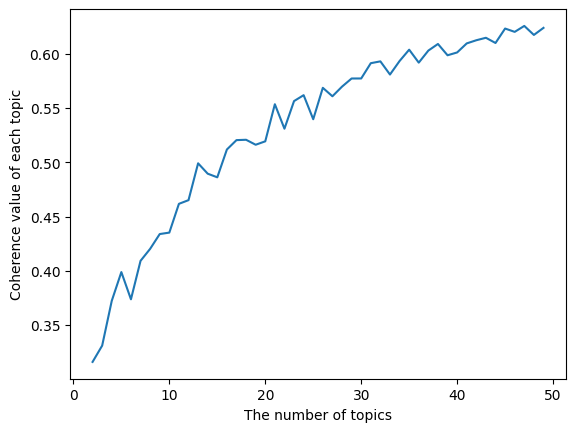

In [ ]:
limit=50;start=2;step=1;
x=range(start,limit,step)
plt.plot(x,coherence_val)
plt.xlabel("The number of topics")
plt.ylabel("Coherence value of each topic")
plt.show()

Now using num_topics corresponding to max coherence value

In [ ]:
import gensim
from pprint import pprint
num_topic=49

lda_model_optimal=gensim.models.LdaMulticore(corpus=corpus,id2word=id2word,num_topics=num_topic)
pprint(lda_model_optimal.print_topics())

[(0,
  '0.032*"lion" + 0.026*"claim" + 0.025*"boat" + 0.023*"stage" + 0.023*"found" '
  '+ 0.018*"tour" + 0.017*"pay" + 0.016*"rule" + 0.015*"spotlight" + '
  '0.013*"servic"'),
 (45,
  '0.035*"doctor" + 0.032*"insur" + 0.021*"spark" + 0.017*"champion" + '
  '0.017*"kill" + 0.015*"back" + 0.015*"mix" + 0.015*"concern" + 0.015*"build" '
  '+ 0.013*"promis"'),
 (40,
  '0.027*"child" + 0.021*"get" + 0.020*"sex" + 0.017*"last" + 0.016*"boost" + '
  '0.015*"dragon" + 0.014*"port" + 0.014*"water" + 0.014*"assault" + '
  '0.013*"ask"'),
 (26,
  '0.040*"concern" + 0.029*"air" + 0.022*"power" + 0.021*"return" + '
  '0.020*"plan" + 0.017*"work" + 0.017*"clear" + 0.016*"develop" + '
  '0.015*"begin" + 0.014*"care"'),
 (27,
  '0.029*"protest" + 0.027*"gold" + 0.021*"coast" + 0.019*"bomber" + '
  '0.019*"continu" + 0.018*"anti" + 0.016*"receiv" + 0.016*"pledg" + '
  '0.016*"vote" + 0.016*"play"'),
 (10,
  '0.036*"open" + 0.027*"pan" + 0.026*"trial" + 0.023*"face" + 0.023*"bank" + '
  '0.022*"show" 

Now visualization

In [ ]:
import pyLDAvis
pyLDAvis.enable_notebook()
ldavisualisation=pyLDAvis.gensim.prepare(lda_model_optimal,corpus,id2word)
ldavisualisation

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
34    -0.113042  0.061290       1        1  2.452819
44    -0.162329 -0.018184       2        1  2.418341
26    -0.007866  0.138146       3        1  2.389589
25    -0.112235 -0.077287       4        1  2.389385
42    -0.050032  0.105491       5        1  2.322470
27    -0.010548 -0.086945       6        1  2.299580
28    -0.102147 -0.030348       7        1  2.269043
15    -0.016409 -0.047315       8        1  2.268372
17    -0.014677 -0.067030       9        1  2.239417
33     0.060825  0.056414      10        1  2.203082
20     0.060607  0.032415      11        1  2.171835
2      0.015026  0.103767      12        1  2.165394
18    -0.031252 -0.037994      13        1  2.164357
32     0.053778 -0.054719      14        1  2.154816
21     0.081404  0.050568      15        1  2.154547
19     0.122688  0.020264      16        1  2.134101
10    -0.077382  0.014539      17        1  2.129896
29    -0.112348  0.055193      18        1  2.096486
8      0.080783  0.034386      19        1  2.091482
39     0.071651 -0.008545      20        1  2.066660
13     0.087335  0.042480      21        1  2.063090
23     0.035215  0.044282      22        1  2.054978
22    -0.007391 -0.132554      23        1  2.034926
47    -0.006710  0.057381      24        1  2.026229
30     0.047488 -0.004259      25        1  2.017434
45    -0.057090  0.135132      26        1  2.008841
38    -0.012023  0.047542      27        1  1.983438
12    -0.089240 -0.135525      28        1  1.982059
48    -0.017525  0.005335      29        1  1.977950
24     0.084596  0.038529      30        1  1.975904
3      0.073487 -0.015631      31        1  1.972431
7     -0.014695  0.095451      32        1  1.972396
1     -0.004639  0.082283      33        1  1.963579
37     0.037111  0.005494      34        1  1.958689
11     0.009661 -0.059603      35        1  1.938463
14    -0.092245  0.048821      36        1  1.932720
9      0.023951 -0.108495      37        1  1.932341
0     -0.084268 -0.045017      38        1  1.926534
5      0.070926 -0.064478      39        1  1.913476
46    -0.053571  0.008272      40        1  1.883242
16    -0.015743  0.013161      41        1  1.859406
40    -0.003986 -0.034076      42        1  1.853397
35     0.018176 -0.094397      43        1  1.840761
36     0.100057  0.002103      44        1  1.803808
31    -0.067739  0.019794      45        1  1.754908
41     0.118145 -0.057329      46        1  1.747748
4     -0.045514 -0.064703      47        1  1.727526
6      0.059630 -0.017374      48        1  1.665168
43     0.070106 -0.056726      49        1  1.646885, topic_info=         Term        Freq       Total Category  logprob  loglift
12          g  338.000000  338.000000  Default  30.0000  30.0000
2135   budget  299.000000  299.000000  Default  29.0000  29.0000
742       cup  251.000000  251.000000  Default  28.0000  28.0000
283      meet  212.000000  212.000000  Default  27.0000  27.0000
81     report  321.000000  321.000000  Default  26.0000  26.0000
...       ...         ...         ...      ...      ...      ...
397      warn   16.680794  241.323918  Topic49  -4.6308   1.4344
461   student   13.990722  106.839896  Topic49  -4.8066   2.0733
277     polic   18.370580  661.455935  Topic49  -4.5343   0.5226
1119  adelaid   12.945159   74.061168  Topic49  -4.8843   2.3621
681        us   14.971716  755.068394  Topic49  -4.7389   0.1856

[2942 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
727       9  0.777816  abattoir
727      25  0.119664  abattoir
2885      4  0.944819    abbott
5217     21  0.970518       abc
5489     49  0.919503    abduct
...     ...       ...       ...
1065      3  0.139702      zone
1065     31  0.046567      zone
1065     44  0.046567      zone
1065     46  0.046567      zone
1065     47  0.651941      zone

[10500 rows x 3 col